## **Clustering Proyect**

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab


import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from pickle import dump    # guardar archivos comprimidos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_calendar = pd.read_csv('/content/drive/MyDrive/DSMarket/data_dsmarket/daily_calendar_with_events.csv')
df_prices = pd.read_csv('/content/drive/MyDrive/DSMarket/data_dsmarket/item_prices.csv')
df_sales = pd.read_csv('/content/drive/MyDrive/DSMarket/data_dsmarket/item_sales.csv')

In [ ]:
df_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [ ]:
df_prices.head()


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
df_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
#AGRUPAMOS LAS TABLAS

In [ ]:
#agrupamos las ventas por año

In [ ]:
dates = pd.date_range(start='2011-01-29', end='2016-04-24', freq='D').strftime('%Y-%m-%d').tolist()

for i in range(1, 1914):
    col = "d_" + str(i)
    df_sales = df_sales.rename(columns={col: dates[i-1]})

In [ ]:
df_sales.head()

,id,item,category,department,store,store_code,region,2011-01-29,2011-01-30,2011-01-31,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:


# Crear una nueva columna "sales" que sea la suma de todas las columnas desde 2011-01-29 hasta 2016-04-24
df_sales['sales'] = df_sales.iloc[:, 6:].sum(axis=1)



In [ ]:
df_sales.head()

,id,item,category,department,store,store_code,region,2011-01-29,2011-01-30,2011-01-31,...,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


In [ ]:


# Eliminar las columnas desde 2011-01-29 hasta 2016-04-24
df_sales = df_sales.drop(df_sales.columns[6:-1], axis=1)


In [ ]:
df_sales.head(100)


,id,item,category,department,store,store_code,sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,1849
...,...,...,...,...,...,...,...
95,ACCESORIES_1_099_NYC_1,ACCESORIES_1_099,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,1847
96,ACCESORIES_1_100_NYC_1,ACCESORIES_1_100,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,1362
97,ACCESORIES_1_102_NYC_1,ACCESORIES_1_102,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,220
98,ACCESORIES_1_103_NYC_1,ACCESORIES_1_103,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,7941


In [ ]:
# Eliminar las columnas id, category, department, store, y store_code
df_sales = df_sales.drop(['id', 'category', 'department', 'store', 'store_code'], axis=1)


In [ ]:
df_sales.head(100)

,item,sales
0,ACCESORIES_1_001,600
1,ACCESORIES_1_002,493
2,ACCESORIES_1_003,288
3,ACCESORIES_1_004,3288
4,ACCESORIES_1_005,1849
...,...,...
95,ACCESORIES_1_099,1847
96,ACCESORIES_1_100,1362
97,ACCESORIES_1_102,220
98,ACCESORIES_1_103,7941


In [ ]:


# Agrupar los productos con el mismo nombre y sumar sus ventas
df_sales = df_sales.groupby(['item'], as_index=False).sum()


In [ ]:
df_sales.head()

,item,sales
0,ACCESORIES_1_001,4093
1,ACCESORIES_1_002,5059
2,ACCESORIES_1_003,1435
3,ACCESORIES_1_004,39175
4,ACCESORIES_1_005,14621


In [ ]:
df_sales.shape

(3049, 2)

In [ ]:
#analizamos df_prices

In [ ]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
df_prices.shape

(6965706, 5)

In [ ]:


# Eliminar las columnas category y store_code yearweek
df_prices = df_prices.drop(['yearweek'], axis=1)


In [ ]:
df_prices.head(100)

,item,category,store_code,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
...,...,...,...,...
95,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
96,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
97,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858
98,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858


In [ ]:


# Eliminar los valores nulos
df_prices = df_prices.dropna()


In [ ]:


# Agrupar los datos por item y calcular la media de sell_price
df_prices = df_prices.groupby('item').mean()


In [ ]:
df_prices.head()

,sell_price
item,
ACCESORIES_1_001,11.036080
ACCESORIES_1_002,5.275835
ACCESORIES_1_003,3.944519
ACCESORIES_1_004,5.988577
ACCESORIES_1_005,3.830302


In [ ]:
df_prices.shape

(3049, 1)

In [ ]:
#Unimos la tabla df_sales y df_prices

In [ ]:
df_final = df_sales.merge(df_prices, on='item', how='left')


In [ ]:
df_final.head()

,item,sales,sell_price
0,ACCESORIES_1_001,4093,11.036080
1,ACCESORIES_1_002,5059,5.275835
2,ACCESORIES_1_003,1435,3.944519
3,ACCESORIES_1_004,39175,5.988577
4,ACCESORIES_1_005,14621,3.830302


In [ ]:
df_final.shape

(3049, 3)

In [ ]:
df_clustering1=df_final.copy()

In [ ]:
#CLUSTERING

In [ ]:
#Determinamos la cantidad de clusters que necesitamos, utilizamos la técnica del codo para determinar la cantidad óptima de clusters. Esta técnica consiste en calcular la suma de las distancias cuadradas de cada punto a su centroide correspondiente y graficar estas distancias contra el número de clusters. La idea es elegir el número de clusters en el que la suma de las distancias cuadradas comience a disminuir a un ritmo más lento. Este punto se conoce como "el codo" y es un buen indicador de cuántos clusters es óptimo para el conjunto de datos.

#Para hacer esto, primero necesitamos aplicar un algoritmo de clustering (kMeans) a tus datos y luego calcular la suma de las distancias cuadradas para diferentes números de clusters. Finalmente, grafica estas distancias cuadradas contra el número de clusters y busca el punto en el que la tasa de disminución se ralentiza. Ese será tu número óptimo de clusters.

In [ ]:
df_clustering1.head(100)

,item,sales,sell_price
0,ACCESORIES_1_001,4093,11.036080
1,ACCESORIES_1_002,5059,5.275835
2,ACCESORIES_1_003,1435,3.944519
3,ACCESORIES_1_004,39175,5.988577
4,ACCESORIES_1_005,14621,3.830302
...,...,...,...
95,ACCESORIES_1_099,15139,19.657581
96,ACCESORIES_1_100,7592,14.917703
97,ACCESORIES_1_102,1933,6.623400
98,ACCESORIES_1_103,71019,0.941427


In [ ]:
media_sell_price = df_clustering1['sell_price'].mean()
print("La media de la columna 'sell_price' es:", media_sell_price)


La media de la columna 'sell_price' es: 5.56802132183794


In [ ]:
df_clustering1.shape

(3049, 3)

In [ ]:
df_clustering1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3048
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        3049 non-null   object 
 1   sales       3049 non-null   int64  
 2   sell_price  3049 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 95.3+ KB


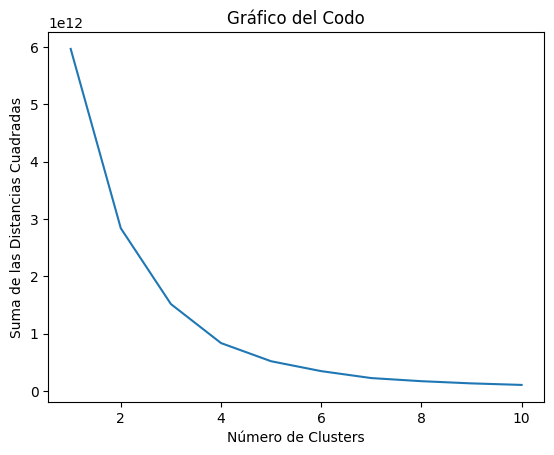

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans



# Calcular la suma de las distancias cuadradas para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clustering1.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

# Graficar la suma de las distancias cuadradas contra el número de clusters
plt.plot(range(1, 11), wcss)
plt.title('Gráfico del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las Distancias Cuadradas')
plt.show()

# Aplicar el algoritmo KMeans al dataframe df_clustering1
N = 3 # Número de clusters óptimo según el gráfico del codo
kmeans = KMeans(n_clusters=N, random_state=0)
kmeans.fit(df_clustering1.iloc[:, 1:])

# Agregar la columna 'cluster' al dataframe df_clustering1
df_clustering1['cluster'] = kmeans.labels_


In [ ]:
df_clustering1.head()

,item,sales,sell_price,cluster
0,ACCESORIES_1_001,4093,11.036080,0
1,ACCESORIES_1_002,5059,5.275835,0
2,ACCESORIES_1_003,1435,3.944519,0
3,ACCESORIES_1_004,39175,5.988577,0
4,ACCESORIES_1_005,14621,3.830302,0


In [ ]:
df_clustering1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3048
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        3049 non-null   object 
 1   sales       3049 non-null   int64  
 2   sell_price  3049 non-null   float64
 3   cluster     3049 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 107.2+ KB


In [ ]:
df_clustering1.shape

(3049, 4)

In [ ]:
df_clustering1.to_csv("/content/drive/MyDrive/TFM Nuclio/CSV CLUSTERS/Cluster.csv", float_format='%.2f', index=False)



In [ ]:
df_clustering1.to_excel("/content/drive/MyDrive/TFM Nuclio/CSV CLUSTERS/Cluster.xlsx", index=False)


In [ ]:
#generamos 3 dataframe cada uno con un cluster

In [ ]:
cluster0 = df_clustering1[df_clustering1['cluster'] == 0]
cluster1 = df_clustering1[df_clustering1['cluster'] == 1]
cluster2 = df_clustering1[df_clustering1['cluster'] == 2]


In [ ]:
#analisis cluster

In [ ]:
cluster0

,item,sales,sell_price,cluster
0,ACCESORIES_1_001,4093,11.036080,0
1,ACCESORIES_1_002,5059,5.275835,0
2,ACCESORIES_1_003,1435,3.944519,0
3,ACCESORIES_1_004,39175,5.988577,0
4,ACCESORIES_1_005,14621,3.830302,0
...,...,...,...,...
3044,SUPERMARKET_3_823,15388,3.351345,0
3045,SUPERMARKET_3_824,8325,3.025279,0
3046,SUPERMARKET_3_825,13526,4.929932,0
3047,SUPERMARKET_3_826,12188,1.535800,0


In [ ]:
cluster0.shape

(2893, 4)

In [ ]:
cluster1

,item,sales,sell_price,cluster
7,ACCESORIES_1_008,87645,0.633021,1
14,ACCESORIES_1_015,84541,0.941401,1
173,ACCESORIES_1_178,90433,0.633132,1
246,ACCESORIES_1_254,87155,0.942423,1
248,ACCESORIES_1_256,79121,0.632278,1
...,...,...,...,...
3021,SUPERMARKET_3_800,90197,2.560519,1
3025,SUPERMARKET_3_804,200598,2.256000,1
3029,SUPERMARKET_3_808,281879,1.177082,1
3032,SUPERMARKET_3_811,178034,2.244906,1


In [ ]:
cluster1.shape

(152, 4)

In [ ]:
cluster2

,item,sales,sell_price,cluster
2314,SUPERMARKET_3_090,1002529,1.637009,2
2476,SUPERMARKET_3_252,565299,1.824418,2
2779,SUPERMARKET_3_555,491287,1.915150,2
2810,SUPERMARKET_3_586,920242,1.915192,2


In [ ]:
cluster2.shape

(4, 4)

In [ ]:
#generamos CSV de los clusters

In [ ]:
#agrupamos los datos por la columna "cluster" y luego calcular la media de las ventas y la media del precio de venta para cada grupo

In [ ]:
cluster0 = df_clustering1[df_clustering1['cluster'] == 0]
mean_sales_cluster0 = cluster0['sales'].mean()
mean_price_cluster0 = cluster0['sell_price'].mean()

cluster1 = df_clustering1[df_clustering1['cluster'] == 1]
mean_sales_cluster1 = cluster1['sales'].mean()
mean_price_cluster1 = cluster1['sell_price'].mean()

cluster2 = df_clustering1[df_clustering1['cluster'] == 2]
mean_sales_cluster2 = cluster2['sales'].mean()
mean_price_cluster2 = cluster2['sell_price'].mean()

print("Mean sales for Cluster 0:", mean_sales_cluster0)
print("Mean price for Cluster 0:", mean_price_cluster0)
print("Mean sales for Cluster 1:", mean_sales_cluster1)
print("Mean price for Cluster 1:", mean_price_cluster1)
print("Mean sales for Cluster 2:", mean_sales_cluster2)
print("Mean price for Cluster 2:", mean_price_cluster2)


Mean sales for Cluster 0: 14218.713100587625
Mean price for Cluster 0: 5.758487304246974
Mean sales for Cluster 1: 141982.3355263158
Mean price for Cluster 1: 2.0414570424754417
Mean sales for Cluster 2: 744839.25
Mean price for Cluster 2: 1.8229421602787457


In [ ]:
#Las características que diferencian los clusters son la cantidad promedio de ventas y el precio promedio de venta.

#renombrar cada cluster de la siguiente manera:

#Cluster 0: Venta Baja y precio medio alto (2893 productos)
#Cluster 1: Venta Moderada y precio medio moderado (152 productos)
#Cluster 2: Venta Alta y precio medio bajo (4 productos)
#tot 3049 productos

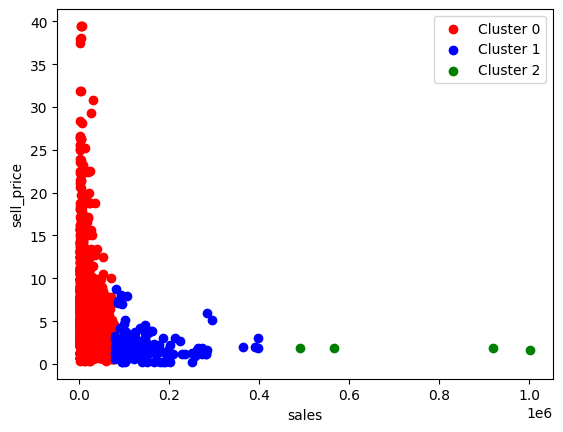

In [ ]:
import matplotlib.pyplot as plt

# Crea una lista de colores para cada cluster
colors = ['red', 'blue', 'green']

# Crea un gráfico de dispersión para cada cluster
for i in range(3):
    plt.scatter(df_clustering1[df_clustering1['cluster'] == i]['sales'],
                df_clustering1[df_clustering1['cluster'] == i]['sell_price'],
                color=colors[i], label='Cluster ' + str(i))

# Agrega etiquetas a los ejes
plt.xlabel('sales')
plt.ylabel('sell_price')

# Agrega una legenda
plt.legend()

# Muestra el gráfico
plt.show()


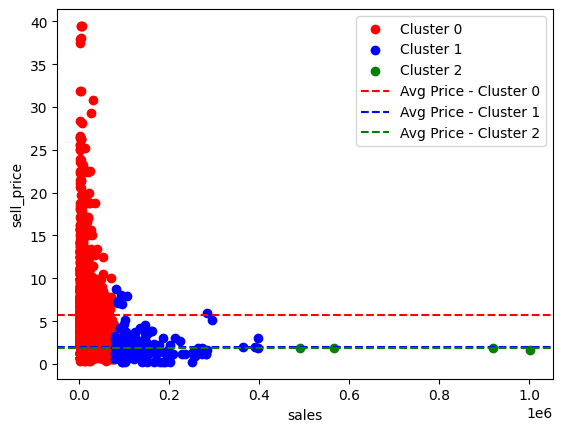

In [ ]:
import matplotlib.pyplot as plt

# Calcula el promedio de sell_price por cluster
df_avg_price = df_clustering1.groupby('cluster')['sell_price'].mean()

# Crea una lista de colores para cada cluster
colors = ['red', 'blue', 'green']

# Crea un gráfico de dispersión para cada cluster
for i in range(3):
    plt.scatter(df_clustering1[df_clustering1['cluster'] == i]['sales'],
                df_clustering1[df_clustering1['cluster'] == i]['sell_price'],
                color=colors[i], label='Cluster ' + str(i))

# Agrega etiquetas a los ejes
plt.xlabel('sales')
plt.ylabel('sell_price')

# Agrega una línea horizontal para mostrar el promedio de sell_price
for i, avg_price in df_avg_price.items():
    plt.axhline(avg_price, color=colors[i], linestyle='dashed', label='Avg Price - Cluster ' + str(i))

# Agrega una legenda
plt.legend()

# Muestra el gráfico
plt.show()


In [ ]:
cluster0.head(100)

,item,sales,sell_price,cluster
0,ACCESORIES_1_001,4093,11.036080,0
1,ACCESORIES_1_002,5059,5.275835,0
2,ACCESORIES_1_003,1435,3.944519,0
3,ACCESORIES_1_004,39175,5.988577,0
4,ACCESORIES_1_005,14621,3.830302,0
...,...,...,...,...
97,ACCESORIES_1_102,1933,6.623400,0
98,ACCESORIES_1_103,71019,0.941427,0
99,ACCESORIES_1_104,2640,31.830636,0
100,ACCESORIES_1_105,12429,8.876963,0


In [ ]:
#generamos la tabla para el grafico de dispersión de Power Bi

In [ ]:
contains_garden = cluster0['item'].str.contains('garden', case=False)
has_garden_product = contains_garden.any()

if has_garden_product:
    print("Hay productos que contienen la palabra 'garden' en la columna 'item'.")
else:
    print("No hay productos que contengan la palabra 'garden' en la columna 'item'.")


Hay productos que contienen la palabra 'garden' en la columna 'item'.


In [ ]:
# Cálculo del precio medio
precio_medio = cluster0['sell_price'].mean()

# Cálculo del total de ventas
total_ventas = cluster0['sales'].sum()

print("Precio medio: ", precio_medio)
print("Total de ventas: ", total_ventas)


Precio medio:  5.758487304246974
Total de ventas:  41134737


In [ ]:
cluster0.shape

(2893, 4)

In [ ]:
unique_items = cluster0['item'].unique()
print(unique_items)



['ACCESORIES_1_001' 'ACCESORIES_1_002' 'ACCESORIES_1_003' ...
 'SUPERMARKET_3_825' 'SUPERMARKET_3_826' 'SUPERMARKET_3_827']


In [ ]:
accessories_count = len(cluster0[cluster0['item'].str.startswith('ACCESORIES')])
supermarket_count = len(cluster0[cluster0['item'].str.startswith('SUPERMARKET')])
home_and_garden_count = len(cluster0[cluster0['item'].str.startswith('HOME_&_GARDEN')])

print("Accessories count:", accessories_count)
print("Supermarket count:", supermarket_count)
print("Home & Garden count:", home_and_garden_count)


Accessories count: 555
Supermarket count: 1315
Home & Garden count: 1023


In [ ]:
total_count = len(cluster0)


In [ ]:
accessories_percentage = (accessories_count / total_count) * 100
supermarket_percentage = (supermarket_count / total_count) * 100
home_and_garden_percentage = (home_and_garden_count / total_count) * 100

In [ ]:
print("Porcentaje de valores que comienzan con 'ACCESORIES':", accessories_percentage)
print("Porcentaje de valores que comienzan con 'SUPERMARKET':", supermarket_percentage)
print("Porcentaje de valores que comienzan con 'GARDEN':", home_and_garden_percentage)

Porcentaje de valores que comienzan con 'ACCESORIES': 19.184237815416523
Porcentaje de valores que comienzan con 'SUPERMARKET': 45.45454545454545
Porcentaje de valores que comienzan con 'GARDEN': 35.361216730038024


In [ ]:
data=cluster0

              sales   sell_price  cluster
count   2893.000000  2893.000000   2893.0
mean   14218.713101     5.758487      0.0
std    14782.691304     4.567772      0.0
min      568.000000     0.305900      0.0
25%     4142.000000     2.933954      0.0
50%     8903.000000     4.417478      0.0
75%    18941.000000     7.309857      0.0
max    78093.000000    39.461012      0.0


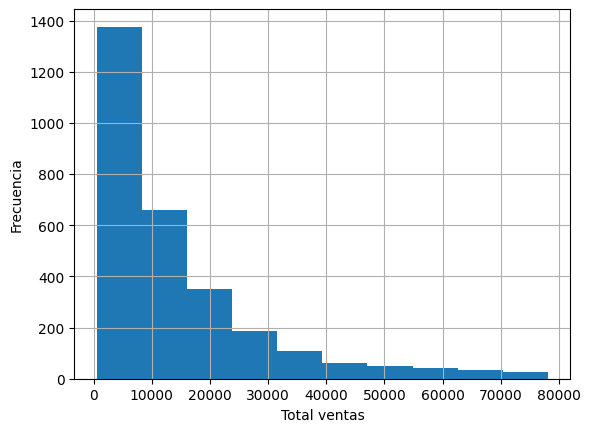

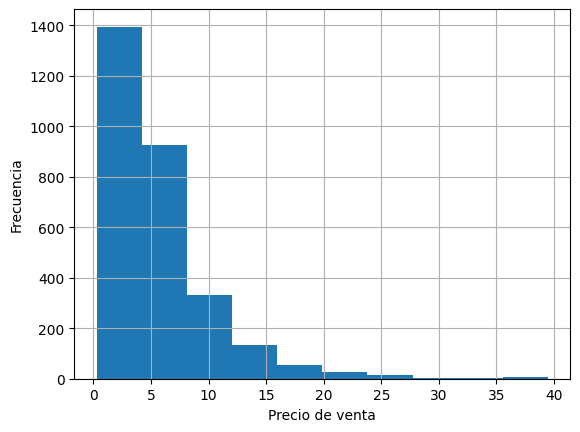

In [ ]:
# Estadísticas descriptivas
print(data.describe())

# Histogramas
data['sales'].hist()
plt.xlabel('Total ventas')
plt.ylabel('Frecuencia')
plt.show()

data['sell_price'].hist()
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()


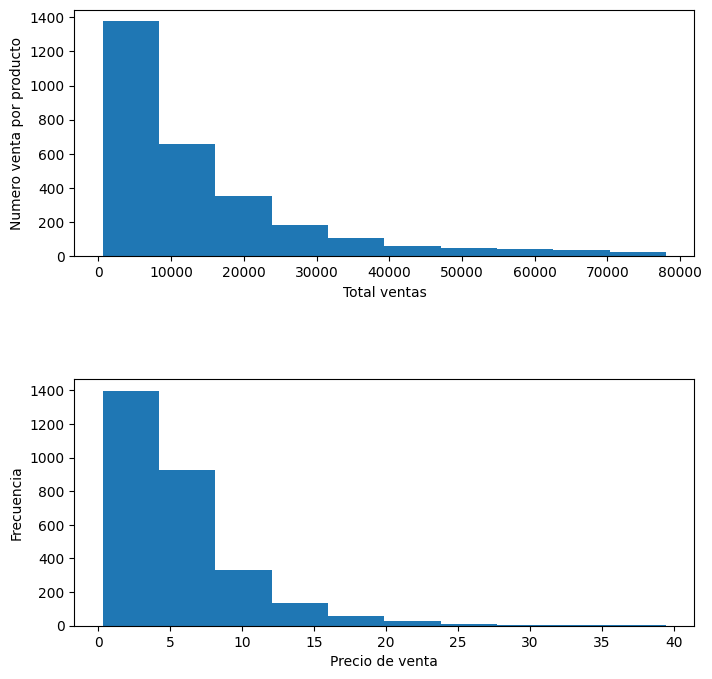

In [ ]:
# Crear la cuadrícula de subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Histograma de ventas
ax1.hist(data['sales'])
ax1.set_xlabel('Total ventas')
ax1.set_ylabel('Numero venta por producto')

# Histograma de precio de venta
ax2.hist(data['sell_price'])
ax2.set_xlabel('Precio de venta')
ax2.set_ylabel('Frecuencia')

# Ajustar los márgenes entre los subgráficos
plt.subplots_adjust(hspace=0.5)

# Mostrar el gráfico
plt.show()


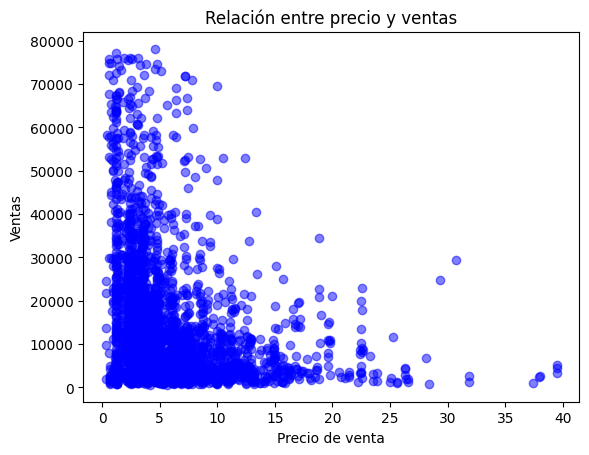

In [ ]:
plt.scatter(cluster0['sell_price'], cluster0['sales'], c='blue', alpha=0.5)

plt.xlabel('Precio de venta')
plt.ylabel('Ventas')
plt.title('Relación entre precio y ventas')

plt.show()



In [ ]:
#estos patrones de frecuencia en ambos gráficos sugieren que hay una mayor demanda y acceso a productos o servicios con precios más bajos, mientras que a medida que los precios aumentan, la demanda disminuye y se dirige a un grupo más específico de clientes dispuestos a pagar precios más alto

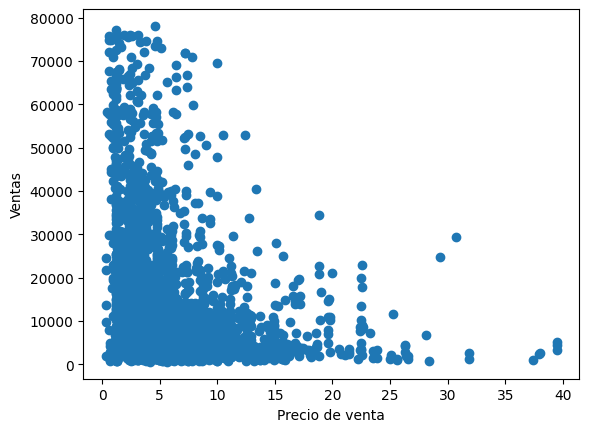

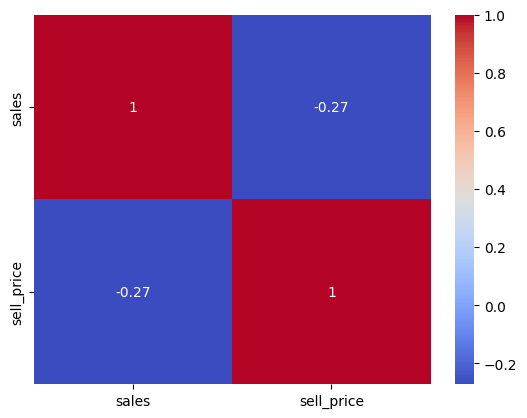

In [ ]:
# Diagrama de dispersión
plt.scatter(data['sell_price'], data['sales'])
plt.xlabel('Precio de venta')
plt.ylabel('Ventas')
plt.show()

# Matriz de correlación
corr_matrix = data[['sales', 'sell_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#se encuentra una correlación negativa  (valor de -0.27) entre los precios de venta y las ventas. Esto indica que a medida que los precios de venta aumentan, las ventas tienden a disminuir

In [ ]:
cluster1.head()

,item,sales,sell_price,cluster
7,ACCESORIES_1_008,87645,0.633021,1
14,ACCESORIES_1_015,84541,0.941401,1
173,ACCESORIES_1_178,90433,0.633132,1
246,ACCESORIES_1_254,87155,0.942423,1
248,ACCESORIES_1_256,79121,0.632278,1


In [ ]:
data1=cluster1

               sales  sell_price  cluster
count     152.000000  152.000000    152.0
mean   141982.335526    2.041457      1.0
std     67621.505239    1.604157      0.0
min     78577.000000    0.241353      1.0
25%     94317.750000    1.173066      1.0
50%    121219.000000    1.402461      1.0
75%    165785.500000    2.558516      1.0
max    396172.000000    8.704167      1.0


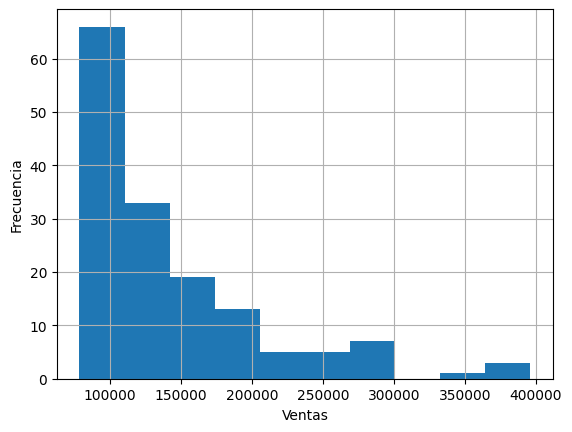

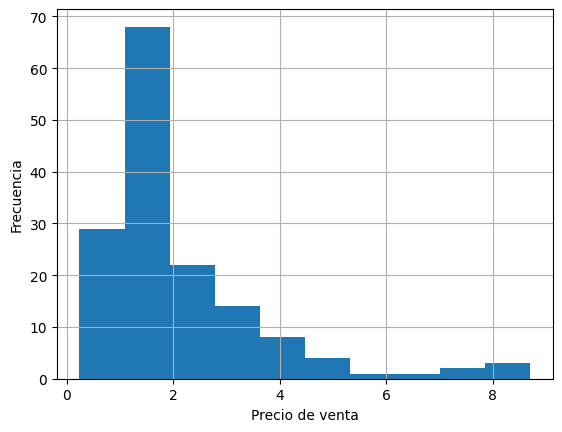

In [ ]:
# Estadísticas descriptivas
print(data1.describe())

# Histogramas
data1['sales'].hist()
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

data1['sell_price'].hist()
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()

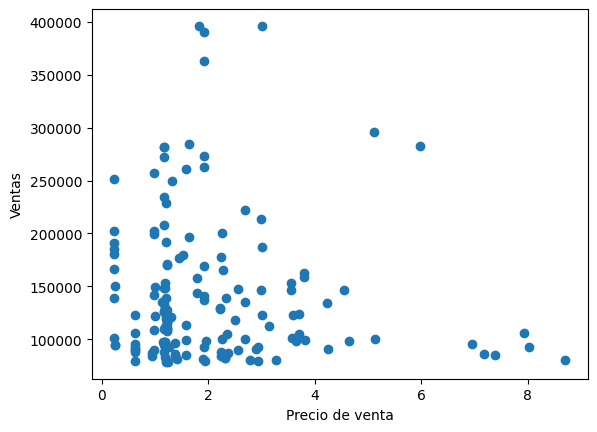

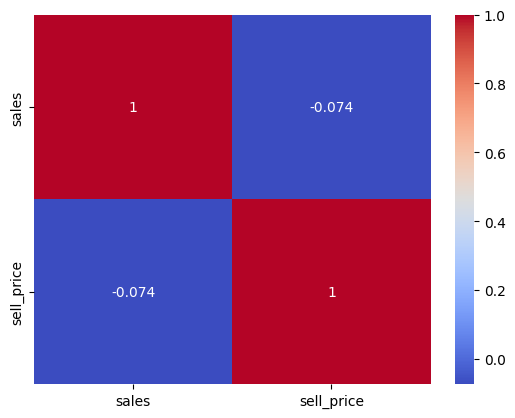

In [ ]:
# Diagrama de dispersión
plt.scatter(data1['sell_price'], data1['sales'])
plt.xlabel('Precio de venta')
plt.ylabel('Ventas')
plt.show()

# Matriz de correlación
corr_matrix = data1[['sales', 'sell_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
cluster2.head()

,item,sales,sell_price,cluster
2314,SUPERMARKET_3_090,1002529,1.637009,2
2476,SUPERMARKET_3_252,565299,1.824418,2
2779,SUPERMARKET_3_555,491287,1.915150,2
2810,SUPERMARKET_3_586,920242,1.915192,2


In [ ]:
cluster2.shape

(4, 4)

In [ ]:
cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2314 to 2810
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        4 non-null      object 
 1   sales       4 non-null      int64  
 2   sell_price  4 non-null      float64
 3   cluster     4 non-null      int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 144.0+ bytes


In [ ]:
data2=cluster2

              sales  sell_price  cluster
count  4.000000e+00    4.000000      4.0
mean   7.448392e+05    1.822942      2.0
std    2.540955e+05    0.131130      0.0
min    4.912870e+05    1.637009      2.0
25%    5.467960e+05    1.777566      2.0
50%    7.427705e+05    1.869784      2.0
75%    9.408138e+05    1.915160      2.0
max    1.002529e+06    1.915192      2.0


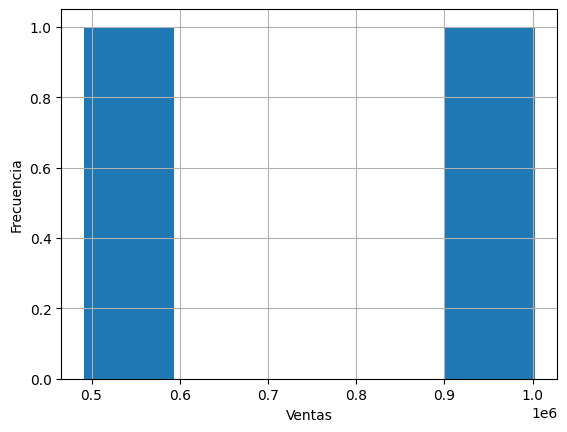

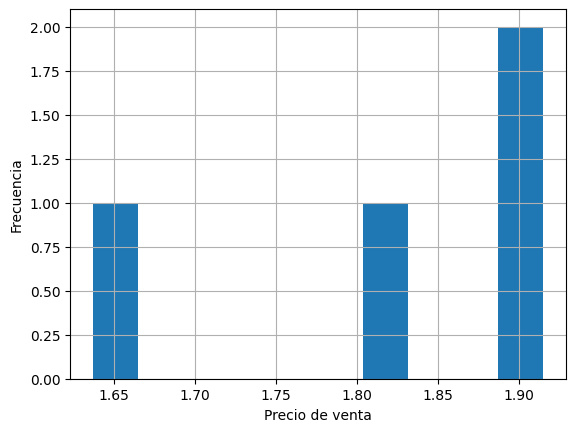

In [ ]:
# Estadísticas descriptivas
print(data2.describe())

# Histogramas
data2['sales'].hist()
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

data2['sell_price'].hist()
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()

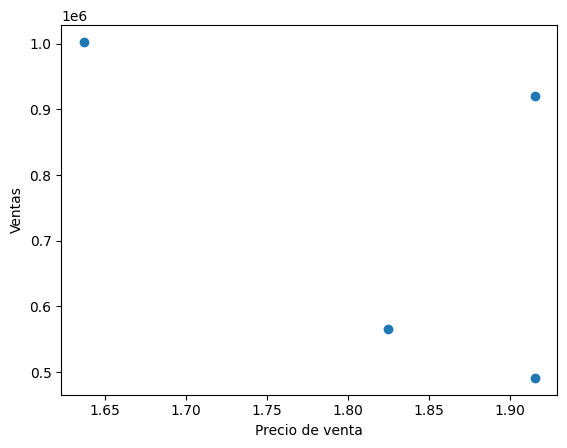

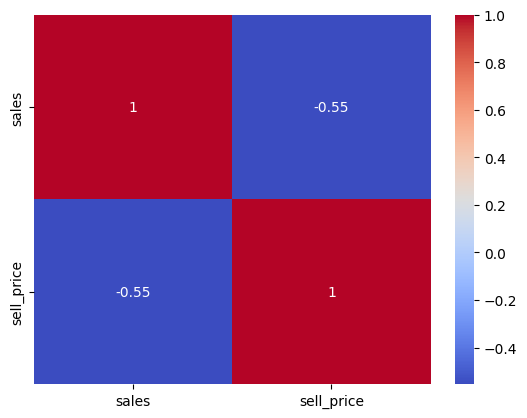

In [ ]:
# Diagrama de dispersión
plt.scatter(data2['sell_price'], data2['sales'])
plt.xlabel('Precio de venta')
plt.ylabel('Ventas')
plt.show()

# Matriz de correlación
corr_matrix = data2[['sales', 'sell_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()